<a href="https://colab.research.google.com/github/Farhan151002/Face-Mask-Detection/blob/main/Face_Mask_Detection_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


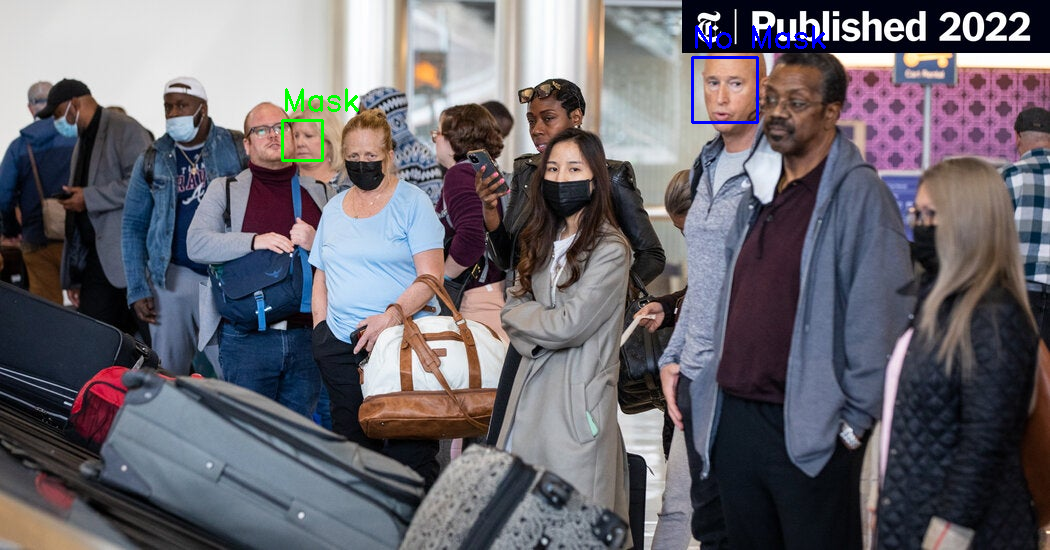

In [ ]:
# Load pre-trained mask detection model
model = load_model('/content/drive/MyDrive/Colab Notebooks/pretrained_model/saved_model.h5')

# Load the pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Define labels for mask detection
mask_det_label = {0: "Mask", 1: "No Mask"}
mask_det_label_colour = {0: (0, 255, 0), 1: (255, 0, 0)}  # Green for mask, red for no mask

# Load image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test_image/test_image_10.jpeg')

# Convert image to grayscale for face detection
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Process each detected face
for (x, y, w, h) in faces:
    # Crop the face from the image
    cropped_face = img[y:y + h, x:x + w]

    # Resize the cropped face to match the input shape expected by the model (224x224)
    cropped_face = cv2.resize(cropped_face, (128, 128))


   # Preprocess the face image for prediction (normalize and reshape)
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0  # Normalize to [0, 1]

    # Predict using the model (this will output a prediction array)
    mask_result = model.predict(cropped_face)

    # Get the label (Mask or No Mask) based on the prediction
    print_label = mask_det_label[mask_result.argmax()]  # Get label with the highest probability
    label_colour = mask_det_label_colour[mask_result.argmax()]  # Green for mask, red for no mask

    # Draw a bounding box around the detected face
    cv2.rectangle(img, (x, y), (x + w, y + h), label_colour, 2)

    # Put the label above the face (adjust text size as needed)
    cv2.putText(img, print_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, label_colour, 2)

# Display the result (image with bounding boxes and labels)
cv2_imshow(img)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


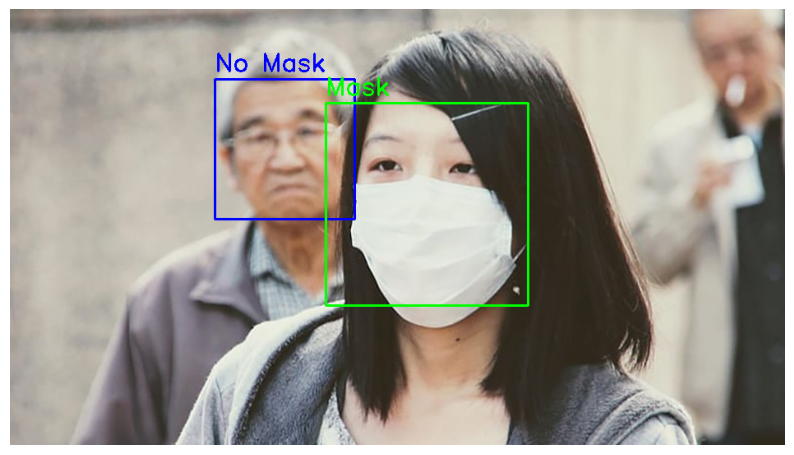

Total Faces Detected: 2
Masked Faces: 2
No Mask Faces: 0


In [ ]:
return_faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Initialize counters
masked_count = 0
no_mask_count = 0

# Detect faces in the image (you already have this part)
return_faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Total number of faces detected
total_faces = len(return_faces)

main_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to BGR for display

# For detected faces in the image
for i in range(total_faces):
    (x, y, w, h) = return_faces[i]
    cropped_face = main_img[y:y + h, x:x + w]
    cropped_face = cv2.resize(cropped_face, (128, 128))
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
    mask_result = model.predict(cropped_face)  # Make model prediction

    # Get label and color for the face
    result_idx = mask_result.argmax()
    print_label = mask_det_label[result_idx]
    label_colour = mask_det_label_colour[result_idx]

    # Update counts
    if result_idx == 0:  # Mask
        masked_count += 1
    else:  # No Mask
        no_mask_count += 1

# Display the final image with counts
plt.figure(figsize=(10, 10))
plt.imshow(main_img)  # Show the image
plt.axis("off")
plt.show()

# Print the counts in the console (optional)
print(f"Total Faces Detected: {total_faces}")
print(f"Masked Faces: {masked_count}")
print(f"No Mask Faces: {no_mask_count}")

